In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
import datetime as DT

os.chdir(r'C:\Users\Asus\Documents\Holmusk data\datasciencepositionatholmusk')
bill_amount = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demo = pd.read_csv('demographics.csv')

In [2]:
#convert to lowercase for ease of application
demo.gender = demo.gender.apply(lambda x: x.lower())

In [3]:
demo.race = demo.race.apply(lambda x: x.lower())

In [4]:
demo.resident_status = demo.resident_status.apply(lambda x: x.lower())

In [5]:
demo.gender.value_counts()

female    1396
male      1333
m          170
f          101
Name: gender, dtype: int64

In [6]:
demo.race.value_counts()

chinese    1915
malay       629
indian      195
others      161
india       100
Name: race, dtype: int64

In [7]:
demo.resident_status.value_counts()

singaporean          1782
singapore citizen     610
pr                    465
foreigner             143
Name: resident_status, dtype: int64

In [8]:
demo.gender = demo.gender.apply(lambda x: 'male' if x == 'm' else('female' if x == 'f' else (x)))

In [9]:
demo.race = demo.race.apply(lambda x: 'indian' if x == 'india' else(x))

In [10]:
demo.resident_status = demo.resident_status.apply(lambda x: 'singaporean' if x == 'singapore citizen' else(x))

In [11]:
demo.date_of_birth = demo.date_of_birth.astype('datetime64')

In [12]:
now = pd.to_datetime('today').year
demo['age'] = now - demo.date_of_birth.dt.year

In [13]:
demo = demo.drop('date_of_birth', axis =1)

In [14]:
demo = demo.set_index('patient_id')

In [15]:
clinical_data = clinical_data.sort_values(['id', 'date_of_admission'])

In [16]:
cd_dup = clinical_data[[not i for i in clinical_data.duplicated(subset = ['id'])]]

In [17]:
cd_dup = cd_dup.fillna(value = 0)

In [18]:
cd_dup.medical_history_3 = cd_dup.medical_history_3.apply(lambda x: x if type(x) == int else (1 if x == 'Yes' else (0)))

In [19]:
cd_dup.medical_history_2 = cd_dup.medical_history_2.astype('int64')
cd_dup.medical_history_5 = cd_dup.medical_history_5.astype('int64')

In [20]:
cd_dup.date_of_admission = cd_dup.date_of_admission.astype('datetime64')
cd_dup.date_of_discharge = cd_dup.date_of_discharge.astype('datetime64')

In [21]:
cd_dup['inpatient_D'] = (cd_dup.date_of_discharge - cd_dup.date_of_admission).dt.days

In [22]:
cd_dup['BMI'] = (cd_dup.weight/(cd_dup.height*cd_dup.height) * 10000)

In [23]:
cd_dup['N_Hist'] = cd_dup.medical_history_1 + cd_dup.medical_history_2 + cd_dup.medical_history_3 + cd_dup.medical_history_4 + cd_dup.medical_history_5 + cd_dup.medical_history_6 + cd_dup.medical_history_7  

In [24]:
cd_dup['N_Med'] = cd_dup.preop_medication_1 + cd_dup.preop_medication_2 + cd_dup.preop_medication_3 + cd_dup.preop_medication_4 + cd_dup.preop_medication_5 

In [25]:
cd_dup['N_Symp'] = cd_dup.symptom_1 + cd_dup.symptom_2 + cd_dup.symptom_3 + cd_dup.symptom_4 + cd_dup.symptom_5 

In [26]:
cd_dup = cd_dup.drop(['date_of_discharge', 'weight', 'height'], axis =1)

In [27]:
cd_dup = cd_dup.set_index('id')

In [28]:
joined = cd_dup.merge(demo, left_index = True, right_index = True)

In [29]:
bill_id['patient_id'] = bill_id.patient_id.astype(str)
bill_id.set_index('patient_id').sort_index()

,bill_id,date_of_admission
patient_id,,
00225710a878eff524a1d13be817e8e2,8461069832,2014-04-10
00225710a878eff524a1d13be817e8e2,7746811189,2014-04-10
00225710a878eff524a1d13be817e8e2,4692776325,2014-04-10
00225710a878eff524a1d13be817e8e2,5175703971,2014-04-10
0029d90eb654699c18001c17efb0f129,3604841170,2012-11-07
0029d90eb654699c18001c17efb0f129,5621737529,2012-11-07
0029d90eb654699c18001c17efb0f129,5041212157,2012-11-07
0029d90eb654699c18001c17efb0f129,645202091,2012-11-07
0040333abd68527ecb53e1db9073f52e,167943546,2013-01-19


In [30]:
bill = pd.merge(bill_id, bill_amount, on = 'bill_id')

In [31]:
bill = bill.drop('bill_id', axis =1 )

In [32]:
bg = bill.groupby(['patient_id', 'date_of_admission']).amount.sum()

In [33]:
bg_ri = bg.reset_index()

In [34]:
bg_first = bg_ri[[not i for i in bg_ri.duplicated(subset = 'patient_id')]]

In [35]:
bg_first = bg_first.set_index('patient_id')

In [36]:
merged = joined.merge(bg_first, left_index = True, right_index = True)

In [37]:
merged = merged.drop(['date_of_admission_x', 'date_of_admission_y'], axis = 1)

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


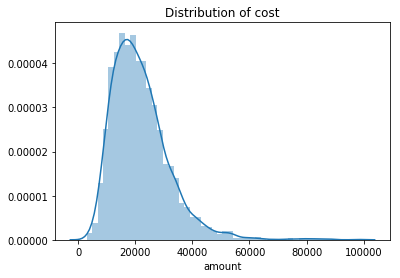

In [38]:
distPlot = sns.distplot(merged['amount'])
plt.title("Distribution of cost")
plt.show()

In [39]:
merged.amount.describe()
#NOTE: Handle outlier cases & assess for need to do log transformation

count     3000.000000
mean     21798.335703
std      10161.000119
min       2946.100354
25%      14665.890997
50%      20101.522184
75%      26733.192619
max      98120.870207
Name: amount, dtype: float64

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


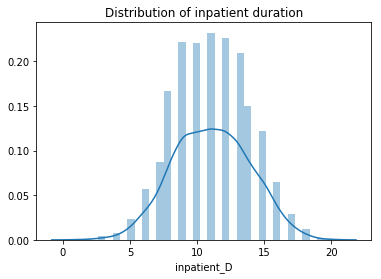

In [40]:
distPlot_inD = sns.distplot(merged['inpatient_D'])
plt.title("Distribution of inpatient duration")
plt.show()

In [41]:
merged.inpatient_D.describe()

count    3000.000000
mean       11.078667
std         2.855497
min         1.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        20.000000
Name: inpatient_D, dtype: float64

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


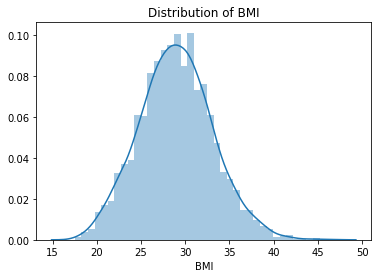

In [42]:
distPlot_bmi = sns.distplot(merged['BMI'])
plt.title("Distribution of BMI")
plt.show()

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


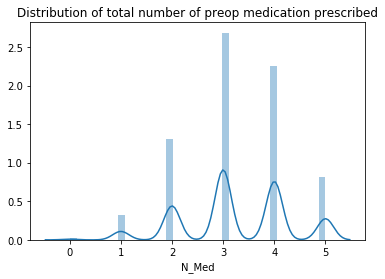

In [52]:
distPlot_N_med = sns.distplot(merged['N_Med'])
plt.title("Distribution of total number of preop medication prescribed")
plt.show()

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


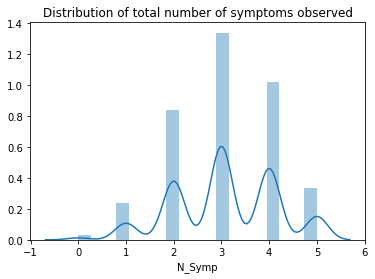

In [54]:
distPlot_N_Symp = sns.distplot(merged['N_Symp'])
plt.title("Distribution of total number of symptoms observed")
plt.show()

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


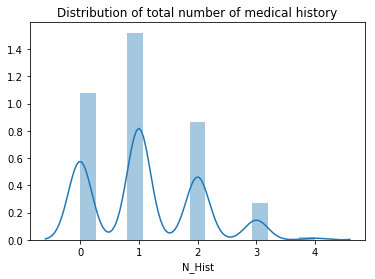

In [55]:
distPlot_N_Hist = sns.distplot(merged['N_Hist'])
plt.title("Distribution of total number of medical history")
plt.show()

In [43]:
merged.BMI.describe()

count    3000.000000
mean       28.955222
std         4.144775
min        17.508651
25%        26.161927
50%        28.921908
75%        31.675212
max        46.677349
Name: BMI, dtype: float64

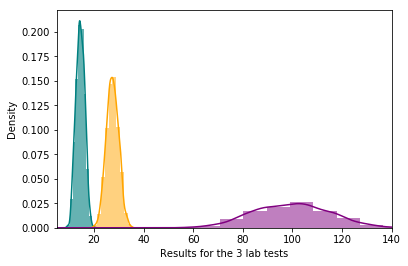

In [44]:
ax = merged['lab_result_1'].hist(density=True, stacked=True, color='teal', alpha=0.6)
merged['lab_result_1'].plot(kind='density', color='teal')
ax = merged['lab_result_2'].hist(density=True, stacked=True, color='orange', alpha=0.5)
merged['lab_result_2'].plot(kind='density', color='orange')
ax = merged['lab_result_3'].hist(density=True, stacked=True, color='purple', alpha=0.5)
merged['lab_result_3'].plot(kind='density', color='purple')
ax.set(xlabel='Results for the 3 lab tests')
plt.xlim(5, 140)
plt.show()
#Most likely the 3 tests are different

In [45]:
#Normalization of numerical columns. Not done on categorical variables for variable inference 
#Choose samples which lie within 3 standard deviations from the mean of normalized variables to preserve sample numbers 
import scipy as sp

numerical_columns = ['amount', 'inpatient_D', 'BMI', 'lab_result_1', 'lab_result_2', 'lab_result_3']
merged_normed = merged[(np.abs(sp.stats.zscore(merged[numerical_columns])) < 3).all(axis=1)]

In [46]:
merged_normed.describe()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,lab_result_1,lab_result_2,lab_result_3,inpatient_D,BMI,N_Hist,N_Med,N_Symp,age,amount
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,...,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000
mean,0.162862,0.287564,0.034753,0.052129,0.058944,0.247359,0.256218,0.500170,0.587734,0.818399,...,14.483816,27.442624,99.617036,11.081090,28.887756,1.099830,3.246678,3.062351,57.335945,21232.128352
std,0.369303,0.452704,0.183185,0.222326,0.235560,0.431551,0.436618,0.500085,0.492326,0.385581,...,1.745219,2.452304,15.119199,2.832323,4.070715,0.916365,1.030781,1.073570,14.538489,8826.831861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,20.100000,57.000000,3.000000,17.508651,0.000000,0.000000,0.000000,28.000000,2946.100354
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,13.200000,25.800000,88.000000,9.000000,26.154824,0.000000,3.000000,2.000000,45.000000,14579.626555
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,14.500000,27.400000,100.000000,11.000000,28.870523,1.000000,3.000000,3.000000,55.000000,19933.214177
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,15.800000,29.200000,110.000000,13.000000,31.601591,2.000000,4.000000,4.000000,70.000000,26479.242239
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.300000,34.500000,143.000000,19.000000,40.945291,4.000000,5.000000,5.000000,88.000000,52224.523780


C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


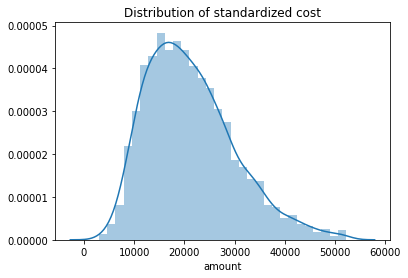

In [47]:
distPlot_cost_normed = sns.distplot(merged_normed['amount'])
plt.title("Distribution of standardized cost")
plt.show()

In [48]:
merged_normed.skew()

medical_history_1     1.827054
medical_history_2     0.939161
medical_history_3     5.083003
medical_history_4     4.031701
medical_history_5     3.747306
medical_history_6     1.171648
medical_history_7     1.117444
preop_medication_1   -0.000682
preop_medication_2   -0.356650
preop_medication_3   -1.652651
preop_medication_4   -0.078465
preop_medication_5   -1.673636
preop_medication_6   -1.091033
symptom_1            -0.481766
symptom_2            -0.661323
symptom_3            -0.180032
symptom_4            -0.993312
symptom_5            -0.085300
lab_result_1         -0.022742
lab_result_2         -0.004279
lab_result_3          0.016645
inpatient_D           0.018023
BMI                   0.079351
N_Hist                0.516904
N_Med                -0.237621
N_Symp               -0.168761
age                   0.258660
amount                0.749955
dtype: float64

# Gender vs Cost 

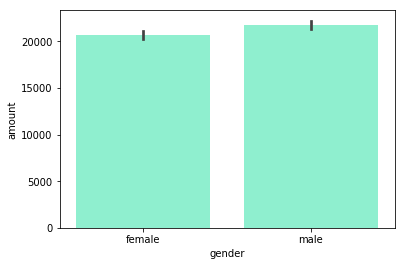

In [47]:
sns.barplot('gender', 'amount', data=merged_normed, color="aquamarine")

# Race vs Cost  

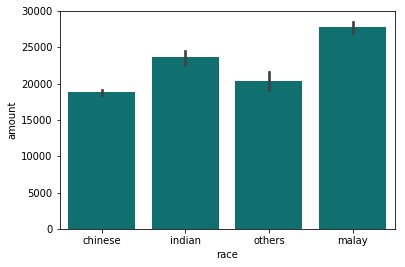

In [50]:
sns.barplot('race', 'amount', data=merged_normed, color="teal")


# Resident Status vs Cost

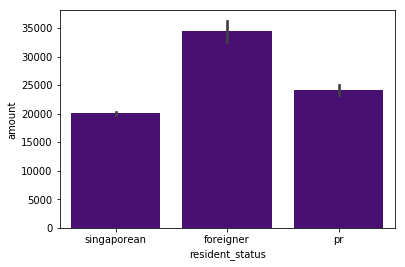

In [51]:
sns.barplot('resident_status', 'amount', data=merged_normed, color="blue")

# Inpatient Duration vs Cost

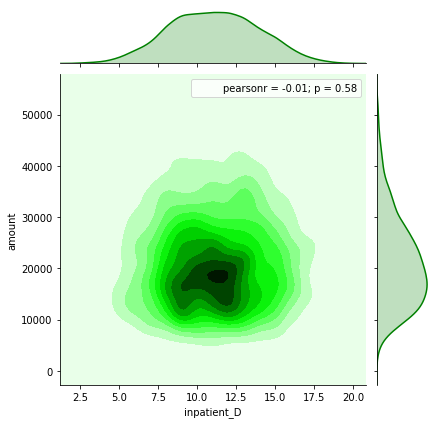

In [58]:
sns.jointplot('inpatient_D', 'amount', data=merged_normed, kind = 'kde', color="g")

# BMI vs Cost

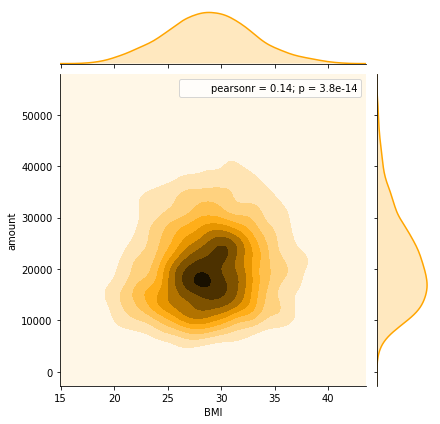

In [70]:
sns.jointplot('BMI', 'amount', data=merged_normed, kind = 'kde',  color="orange")

# Age vs Cost

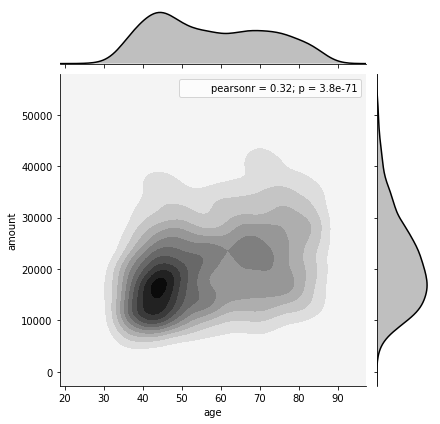

In [76]:
sns.jointplot('age', 'amount', data=merged_normed, kind = 'kde', color="k")

# Medical History Availability vs Cost

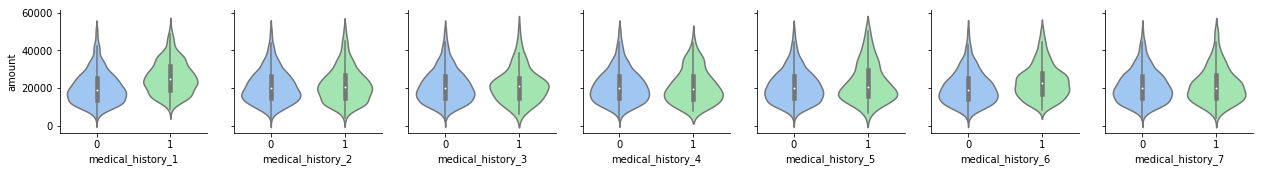

In [83]:
g = sns.PairGrid(x_vars=["medical_history_1", "medical_history_2", "medical_history_3", "medical_history_4", "medical_history_5",
                        "medical_history_6", "medical_history_7"],
                 y_vars=["amount"], data = merged_normed)
g.map(sns.violinplot, palette="pastel")

# Symptom presence vs Cost

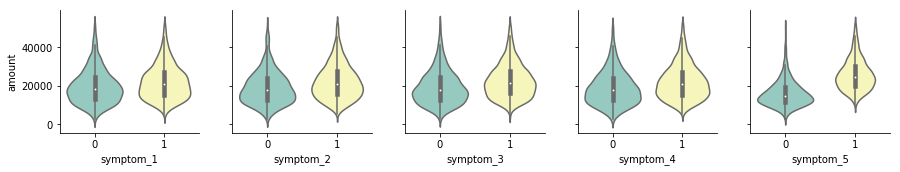

In [90]:
g = sns.PairGrid(x_vars=["symptom_1", "symptom_2", "symptom_3", "symptom_4", "symptom_5"], 
                 y_vars=["amount"], data = merged_normed)
g.map(sns.violinplot, palette="Set3")

# Pre-op medication type prescription vs Cost

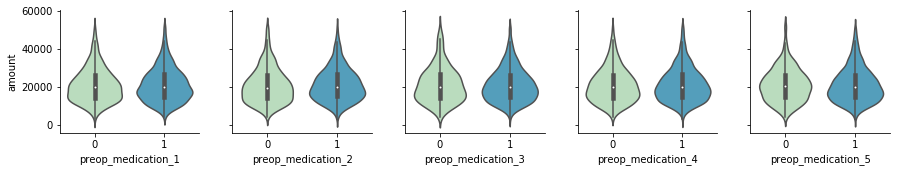

In [87]:
g = sns.PairGrid(x_vars=["preop_medication_1", "preop_medication_2", "preop_medication_3", "preop_medication_4", "preop_medication_5"], 
                 y_vars=["amount"], data = merged_normed)
g.map(sns.violinplot, palette="GnBu")

# Number of pre-op medication prescribed vs cost

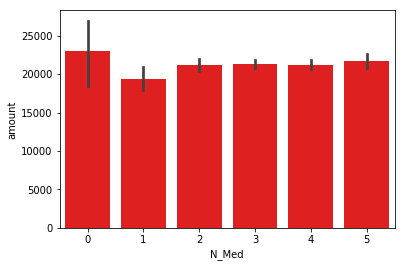

In [58]:
sns.barplot('N_Med', 'amount', data=merged_normed, color="red")

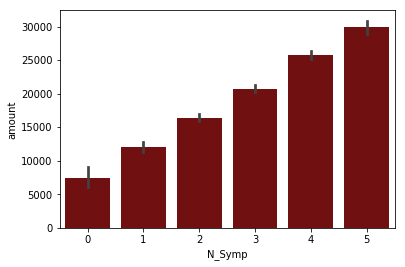

In [59]:
sns.barplot('N_Symp', 'amount', data=merged_normed, color="maroon")

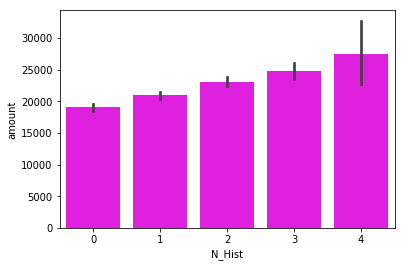

In [60]:
sns.barplot('N_Hist', 'amount', data=merged_normed, color="magenta")

In [61]:
Data = merged.reset_index().drop('index', axis =1)

In [62]:
to_encode = ['gender', 'race', 'resident_status']
Data_encoded = pd.get_dummies(Data, columns = to_encode)

In [63]:
X = Data_encoded.drop('amount', axis =1)
X_ = X.as_matrix()
Y = Data_encoded.loc[:, 'amount'].astype('int64')

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [64]:
X_headers = list(X)

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

et_rgr = ExtraTreesRegressor(bootstrap = True, oob_score = True)
et_rgr = et_rgr.fit(X_, Y)
etrgr_fi = et_rgr.feature_importances_
b = list(zip(X_headers,list(etrgr_fi)))
etrgr_fi_ = pd.DataFrame(data = b, columns = ['Variable', 'Feature Importance']).sort_values('Feature Importance')
etrgr_fi_.tail()

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


,Variable,Feature Importance
25,N_Symp,0.073439
26,age,0.084544
31,race_malay,0.167914
33,resident_status_foreigner,0.198847
17,symptom_5,0.273115


Feature ranking:
1. symptom_5 (0.273115)
2. resident_status_foreigner (0.198847)
3. race_malay (0.167914)
4. age (0.084544)
5. N_Symp (0.073439)
6. medical_history_1 (0.044349)
7. medical_history_6 (0.022518)
8. symptom_3 (0.012690)
9. resident_status_pr (0.011878)
10. resident_status_singaporean (0.011486)
11. race_chinese (0.011108)
12. BMI (0.010321)
13. N_Hist (0.010316)
14. race_indian (0.008706)
15. symptom_2 (0.006230)
16. symptom_4 (0.005713)
17. lab_result_1 (0.004087)
18. inpatient_D (0.003610)
19. lab_result_2 (0.003597)
20. lab_result_3 (0.003110)
21. medical_history_7 (0.003069)
22. preop_medication_2 (0.002931)
23. N_Med (0.002848)
24. preop_medication_6 (0.002753)
25. symptom_1 (0.002673)
26. medical_history_2 (0.002559)
27. preop_medication_4 (0.002408)
28. preop_medication_1 (0.002374)
29. preop_medication_5 (0.001801)
30. gender_female (0.001782)
31. gender_male (0.001742)
32. medical_history_5 (0.001664)
33. preop_medication_3 (0.001467)
34. medical_history_4 (0.0011

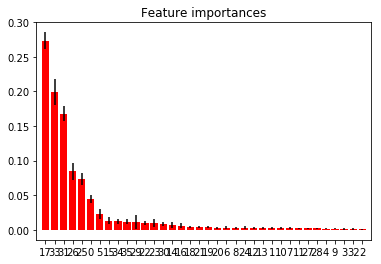

In [73]:
etrgr_fi_d = dict(zip(list(etrgr_fi), X_headers))
stdev = np.std([tree.feature_importances_ for tree in et_rgr.estimators_], axis=0)
indices = np.argsort(etrgr_fi)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_.shape[1]):
    print("%d. %s (%f)" % (f + 1, etrgr_fi_d[etrgr_fi[indices[f]]], etrgr_fi[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), etrgr_fi[indices],
       color="r", yerr=stdev[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()